In [1]:
#carregando bibliotecas
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Diretório onde estão os arquivos
pasta_arquivos = "dados" 

In [3]:
# Arquivos dos Extrato de doações

# Listar todos os arquivos que seguem o mesmo padrão
arquivos = [f for f in os.listdir(pasta_arquivos) if f.startswith("Extrato_31_") and f.endswith(".xlsx")]

# Lista para armazenar os DataFrames
dfs = []

# Ler cada arquivo e adicioná-lo à lista
total_arquivos = len(arquivos)
print(f"Encontrados {total_arquivos} arquivos para consolidar...")
for arquivo in arquivos:
    caminho_arquivo = os.path.join(pasta_arquivos, arquivo)
    df = pd.read_excel(caminho_arquivo)  # Lendo o arquivo
    df["Fonte"] = arquivo  # Adicionar coluna de origem para referência
    dfs.append(df)  # Adicionando à lista

# Concatenar todos os DataFrames
consolidado_arrecadado = pd.concat(dfs, ignore_index=True)
#transformando data em data
consolidado_arrecadado["Data"] = pd.to_datetime(consolidado_arrecadado["Data"], errors="coerce", dayfirst=True)
#criando mes ano
consolidado_arrecadado["AnoMes"] = consolidado_arrecadado["Data"].dt.to_period("M")
#criando ano
consolidado_arrecadado["Ano"] = consolidado_arrecadado["Data"].dt.year

consolidado_arrecadado

Encontrados 45 arquivos para consolidar...


,Data,ID,Forma_Pagamento,Valor,Fonte,AnoMes,Ano
0,2022-01-03,8311474,DOC - CREDITO EM CONTA,200.0,Extrato_31_01_2022.xlsx,2022-01,2022
1,2022-01-03,61243703,DOC - CREDITO EM CONTA,30.0,Extrato_31_01_2022.xlsx,2022-01,2022
2,2022-01-03,86336164,PIX RECEBIDO,100.0,Extrato_31_01_2022.xlsx,2022-01,2022
3,2022-01-03,21718869,PIX RECEBIDO,50.0,Extrato_31_01_2022.xlsx,2022-01,2022
4,2022-01-03,65837441,PIX RECEBIDO,100.0,Extrato_31_01_2022.xlsx,2022-01,2022
...,...,...,...,...,...,...,...
4745,2024-12-20,43247610,PIX RECEBIDO,500.0,Extrato_31_12_2024.xlsx,2024-12,2024
4746,2024-12-27,39099146,PIX RECEBIDO,30.0,Extrato_31_12_2024.xlsx,2024-12,2024
4747,2024-12-30,16068039,PIX RECEBIDO,50.0,Extrato_31_12_2024.xlsx,2024-12,2024
4748,2024-12-30,58302957,PIX RECEBIDO,20.0,Extrato_31_12_2024.xlsx,2024-12,2024


In [4]:
# Caminho do arquivo Excel
arquivo_custos = "dados\Custos_mensal.xlsx" 

# Carregar todas as abas do arquivo
xls = pd.ExcelFile(arquivo_custos)

# Filtrar apenas as abas que seguem o padrão 'gastos_mes_ano'
abas_validas = [sheet for sheet in xls.sheet_names if sheet.startswith("gastos_")]

# Lista para armazenar os DataFrames
dfs = []

print(f"Encontradas {len(abas_validas)} abas para consolidar...")
for aba in abas_validas:
    df = pd.read_excel(xls, sheet_name=aba, usecols=[0, 1, 2, 3, 4], header=0)  # Lendo cada aba
    df["Fonte"] = aba  # Adicionar coluna de origem para referência
    dfs.append(df)

# Concatenar todas as abas
consolidado_custos = pd.concat(dfs, ignore_index=True)

#transformando data em data
consolidado_custos["Data"] = pd.to_datetime(consolidado_custos["Data"], errors="coerce", dayfirst=True)
#criando mes ano
consolidado_custos["AnoMes"] = consolidado_custos["Data"].dt.to_period("M")
#criando ano
consolidado_custos["Ano"] = consolidado_custos["Data"].dt.year

consolidado_custos

Encontradas 45 abas para consolidar...


,Num_Nota,Data,Descrição,Local,Valor,Fonte,AnoMes,Ano
0,1,2025-01-05,Salário Cleverton (motorista),NaN,3250.00,gastos_janeiro_2025,2025-01,2025
1,2,2025-01-05,Salário Thiago (cozinheiro),NaN,3250.00,gastos_janeiro_2025,2025-01,2025
2,3,2025-01-05,Aluguel da cozinha casa Thiago,NaN,1200.00,gastos_janeiro_2025,2025-01,2025
3,4,2025-01-21,Gasolina,GS Posto de Combustivel Ltda,60.00,gastos_janeiro_2025,2025-01,2025
4,5,2025-01-22,Atacadao,Brasileiro Atacado SA,435.25,gastos_janeiro_2025,2025-01,2025
...,...,...,...,...,...,...,...,...
778,18,2021-05-26,2 kits de Colheres - 500 unidades,"(a nota ainda nao foi emitida, solicitando no ...",307.96,gastos_maio_21,2021-05,2021
779,19,2021-05-26,Emabalagens de Marmitas - 1500 unidades,"(a nota ainda nao foi emitida, solicitando no ...",669.95,gastos_maio_21,2021-05,2021
780,20,2021-05-26,Emabalagem de marmitsa - 300 unidades,Norpak comercio de embalagem,225.00,gastos_maio_21,2021-05,2021
781,21,2021-05-31,Salário Thiago (cozinheiro),NaN,3000.00,gastos_maio_21,2021-05,2021


In [33]:
# Caminho do arquivo Excel
arquivo_marmitas = "dados\Descricao_Marmitas_1.xlsx"  
descricao_marmitas = pd.read_excel(arquivo_marmitas)

# Remover linhas onde as colunas principais estão em branco
descricao_marmitas = descricao_marmitas.dropna(subset=["Data", "Quantidade", "Cardápio"])

#Substituindo NaN por 0 nas quantidades de alimentos
descricao_marmitas.iloc[:, 4:11] = descricao_marmitas.iloc[:, 4:11].fillna(0)

#transformando data em data
descricao_marmitas["Data"] = pd.to_datetime(descricao_marmitas["Data"], errors="coerce", dayfirst=True)
#criando mes ano
descricao_marmitas["AnoMes"] = descricao_marmitas["Data"].dt.to_period("M")
#criando ano
descricao_marmitas["Ano"] = descricao_marmitas["Data"].dt.year

descricao_marmitas

C:\Users\adria\AppData\Local\Temp\ipykernel_23452\1494108229.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  descricao_marmitas.iloc[:, 4:11] = descricao_marmitas.iloc[:, 4:11].fillna(0)


,Carimbo de data/hora,Data,Quantidade,Cardápio,frango,carne,calabresa,linguiça,arroz,feijao,macarrao,AnoMes,Ano
0,NaT,2021-05-01,47.0,"arroz, feijao, farofa e carne com batata",0.0,5.0,0.0,0.0,2.5,2.0,0,2021-05,2021
1,NaT,2021-05-02,45.0,"Arroz, Strogonoff de frango e batata palha.",5.0,0.0,0.0,0.0,2.5,0.0,0,2021-05,2021
2,NaT,2021-05-03,46.0,"Arroz, feijao, farofa e carne com batata",0.0,5.0,0.0,0.0,2.5,2.0,0,2021-05,2021
3,NaT,2021-05-04,44.0,"Arroz, feijao, farofa e carne de porco",0.0,5.0,0.0,0.0,2.5,2.0,0,2021-05,2021
4,2021-05-05 13:33:27.124,2021-05-05,47.0,Macarrão com molho de linguiça.,0.0,0.0,0.0,5.0,0.0,0.0,2,2021-05,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,2025-02-04 17:27:29.566,2025-01-24,47.0,"Arroz, feijão preto, carne moida com acelga e ...",0.0,2.0,0.0,0.0,1.5,1.5,0,2025-01,2025
936,2025-02-04 17:28:05.468,2025-01-28,57.0,Macarrão com molho de linguiça.,0.0,0.0,0.0,2.5,0.0,0.0,3,2025-01,2025
937,2025-02-04 17:28:34.479,2025-01-29,53.0,"Arroz, feijão, moela com legumes e purê de bat...",0.0,2.0,0.0,0.0,1.5,1.5,0,2025-01,2025
938,2025-02-04 17:29:09.471,2025-01-30,61.0,"Arroz, feijão, carne moída com batata e salada...",0.0,2.0,0.0,0.0,1.5,1.5,0,2025-01,2025


## Explorar base  consolidado_arrecadado:

Validando os dados
1. As arrecadações batem, mensalmente (isso quer dizer que tem que somar por mês) com o relatório disponível? 

Explorando um pouco
1. Qual a menor e maior data?
2. Quantos doadores distintos existem?
3. Quantos doadores distintos existem por mês? Existe algum comportamento ao longo do tempo? (gráfico de linha)
4. Qual a distribuição do valores doados de uma forma geral? (descritiva, histograma e boxplot)
5. Como é a média de valor doado por mês?  Existe algum comportamento ao longo do tempo? (gráfico de linha)
6. Quem são os doadores que mais doaram de forma geral? (somando todas as doações)
7. Quem são os doadores que mais doaram em quantidade de vezes? (quantidade de doações)
8. Existem doadores que fazem tempo que não doam? (ordenar do maior para menor)
9. Quais são as formas de pagamento e suas frequências?
10. Como está a soma de arrecadações por mês? (gráfico de linhas)

In [6]:
#Validando os dados
#As arrecadações batem, mensalmente (isso quer dizer que tem que somar por mês) com o relatório disponível?
consolidado_arrecadado_mes_ano = consolidado_arrecadado.groupby("AnoMes")["Valor"].sum().reset_index()
consolidado_arrecadado_mes_ano

,AnoMes,Valor
0,2021-05,10430.00
1,2021-06,28970.00
2,2021-07,17926.00
3,2021-08,21681.00
4,2021-09,28844.60
5,2021-10,14100.00
6,2021-11,22694.63
7,2021-12,19270.25
8,2022-01,22093.33
9,2022-02,14855.00


In [7]:
#1. Qual a menor e maior data?
menor_data = consolidado_arrecadado["Data"].min()
maior_data = consolidado_arrecadado["Data"].max()

print(f"Menor data: {menor_data}, Maior data: {maior_data}")

Menor data: 2021-05-01 00:00:00, Maior data: 2025-01-31 00:00:00


In [8]:
#2. Quantos doadores distintos existem?
doadores_distintos = consolidado_arrecadado["ID"].nunique()
print(f"Total de doadores distintos: {doadores_distintos}")

Total de doadores distintos: 620


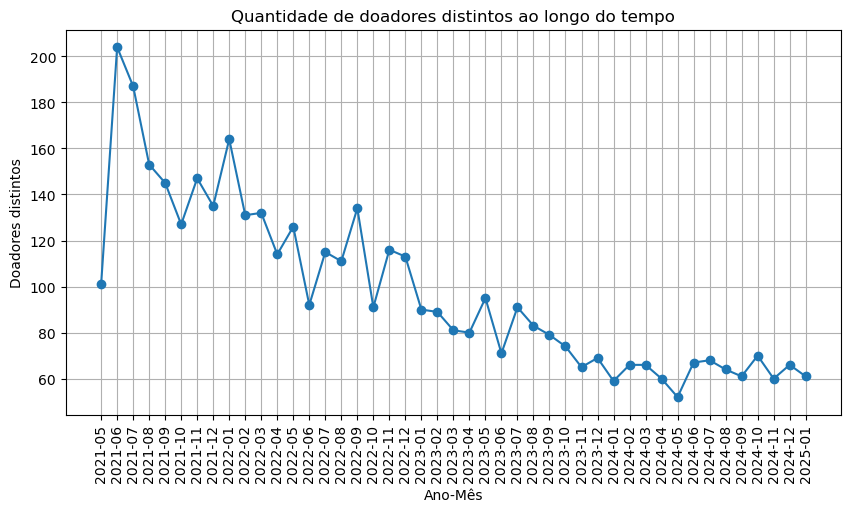

In [9]:
#3. Quantos doadores distintos existem por mês? Existe algum comportamento ao longo do tempo? (gráfico de linha)
doadores_por_mes = consolidado_arrecadado.groupby("AnoMes")["ID"].nunique().reset_index()

plt.figure(figsize=(10, 5))
plt.plot(doadores_por_mes["AnoMes"].astype(str), doadores_por_mes["ID"], marker='o', linestyle='-')
plt.xticks(rotation=90)
plt.xlabel("Ano-Mês")
plt.ylabel("Doadores distintos")
plt.title("Quantidade de doadores distintos ao longo do tempo")
plt.grid(True)
plt.show()


count     4750.000000
mean       127.468120
std        354.394567
min          5.000000
25%         50.000000
50%         62.500000
75%        100.000000
max      15000.000000
Name: Valor, dtype: float64


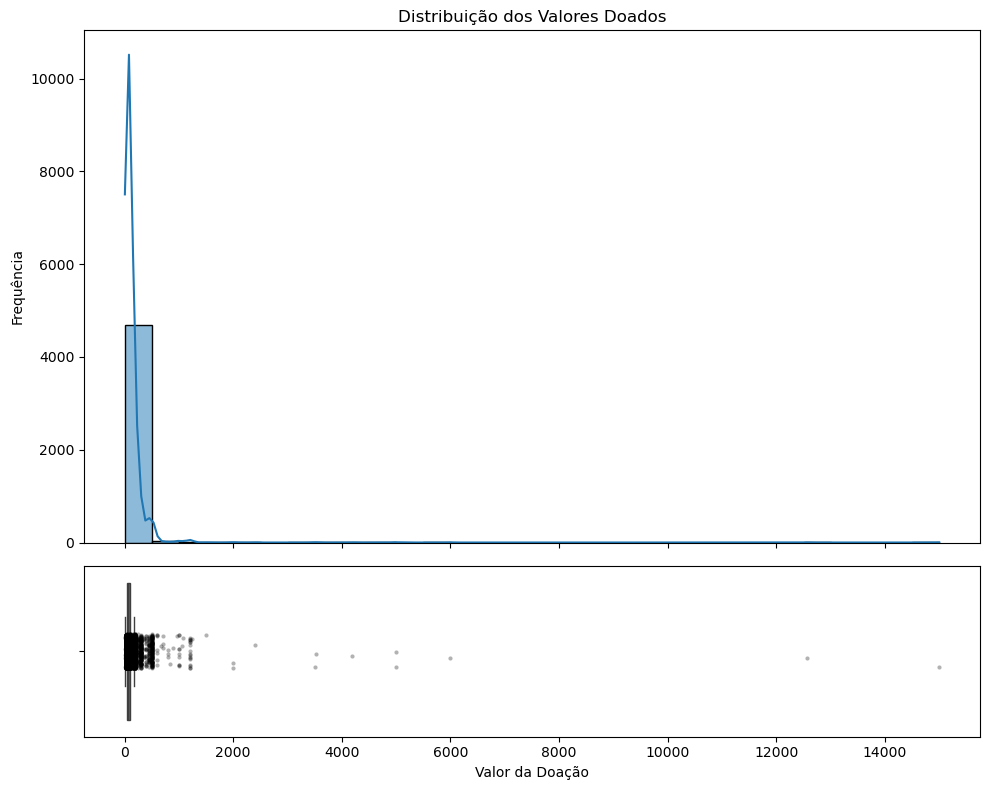

In [10]:
#4. Qual a distribuição do valores doados de uma forma geral? (descritiva, histograma e boxplot)

# Estatísticas descritivas
print(consolidado_arrecadado["Valor"].describe())

# Criando a figura e os eixos compartilhados
fig, ax = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={"height_ratios": [3, 1]}, sharex=True)

# Histograma
sns.histplot(consolidado_arrecadado["Valor"], bins=30, kde=True, ax=ax[0])
ax[0].set_ylabel("Frequência")
ax[0].set_title("Distribuição dos Valores Doados")

# Boxplot com pontos individuais (stripplot)
sns.boxplot(x=consolidado_arrecadado["Valor"], ax=ax[1], showfliers=False)
sns.stripplot(x=consolidado_arrecadado["Valor"], ax=ax[1], color="black", alpha=0.3, jitter=True, size=3)
ax[1].set_xlabel("Valor da Doação")
ax[1].set_ylabel("")

# Ajuste de layout
plt.tight_layout()
plt.show()



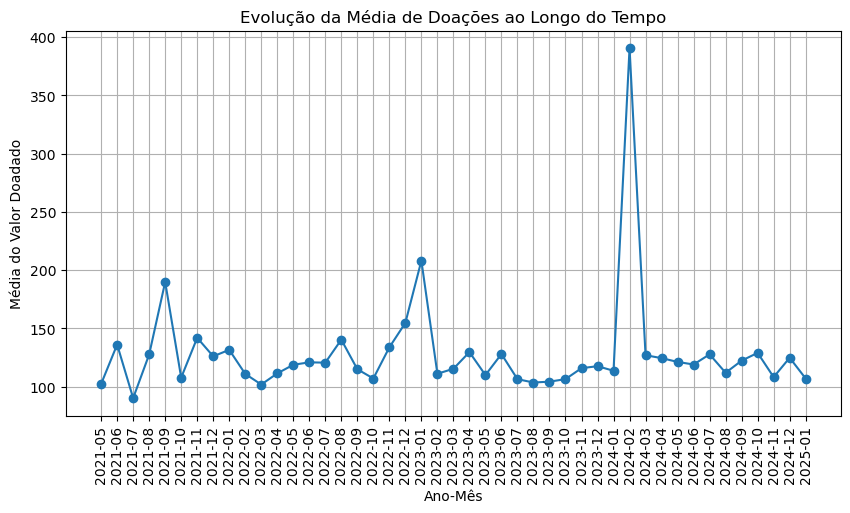

In [11]:
#5. Como é a média de valor doado por mês?  Existe algum comportamento ao longo do tempo? (gráfico de linha)
media_valor_mes = consolidado_arrecadado.groupby("AnoMes")["Valor"].mean().reset_index()

plt.figure(figsize=(10, 5))
plt.plot(media_valor_mes["AnoMes"].astype(str), media_valor_mes["Valor"], marker='o', linestyle='-')
plt.xticks(rotation=90)
plt.xlabel("Ano-Mês")
plt.ylabel("Média do Valor Doadado")
plt.title("Evolução da Média de Doações ao Longo do Tempo")
plt.grid(True)
plt.show()


In [12]:
#6. Quem são os doadores que mais doaram de forma geral? (somando todas as doações)
top_doadores = consolidado_arrecadado.groupby("ID")["Valor"].sum().reset_index()
top_doadores = top_doadores.sort_values(by="Valor", ascending=False)
top_doadores

,ID,Valor
261,43247610,28000.0
476,78292125,21650.0
277,46825102,20750.0
607,97645965,18500.0
217,36696773,16450.0
...,...,...
343,58345087,20.0
608,98072293,15.0
331,56812153,15.0
206,32970130,15.0


In [13]:
#7. Quem são os doadores que mais doaram em quantidade de vezes? (quantidade de doações)
top_doadores = consolidado_arrecadado.groupby("ID").agg(
    Quantidade_Doacoes=("Valor", "count"),
    Total_Valor_Doado=("Valor", "sum")
).reset_index()

# Ordenar pelos maiores valores doados
top_doadores = top_doadores.sort_values(by="Total_Valor_Doado", ascending=False)
top_doadores.head(40)

,ID,Quantidade_Doacoes,Total_Valor_Doado
261,43247610,45,28000.00
476,78292125,18,21650.00
277,46825102,46,20750.00
607,97645965,2,18500.00
217,36696773,41,16450.00
104,17507807,7,15570.49
88,14353532,43,12900.00
159,26564652,25,12500.00
281,47477158,46,11750.00
228,38717205,6,8695.00


In [14]:
#8. Existem doadores que fazem tempo que não doam? (ordenar do maior para menor)
# Calcular a última doação de cada doador
ultima_doacao = consolidado_arrecadado.groupby("ID")["Data"].max().reset_index()

# Calcular a diferença em meses da última doação para hoje
hoje = pd.to_datetime("today")
ultima_doacao["Meses_Desde_Ultima"] = (hoje.year - ultima_doacao["Data"].dt.year) * 12 + (hoje.month - ultima_doacao["Data"].dt.month)

# Ordenar pelos doadores que estão há mais tempo sem doar
ultima_doacao = ultima_doacao.sort_values(by="Meses_Desde_Ultima", ascending=False)
ultima_doacao

,ID,Data,Meses_Desde_Ultima
544,88440991,2021-05-01,46
430,72314264,2021-05-01,46
304,52000185,2021-05-02,46
318,54497181,2021-05-03,46
555,90231802,2021-05-01,46
...,...,...,...
316,54129872,2025-01-01,2
187,31084513,2025-01-01,2
354,60563852,2025-01-03,2
88,14353532,2025-01-03,2


In [15]:
#9. Quais são as formas de pagamento e suas frequências?
formas_pagamento = consolidado_arrecadado["Forma_Pagamento"].value_counts().reset_index()
formas_pagamento.columns = ["Forma_Pagamento", "Frequência"]
formas_pagamento

,Forma_Pagamento,Frequência
0,PIX RECEBIDO,4270
1,TED RECEBIDA,142
2,CP,131
3,desconhecido,109
4,DOC - CREDITO EM CONTA,63
5,TRANSFERENCIA A CREDITO,28
6,TRANSFERENCIA RECEBIDA,7


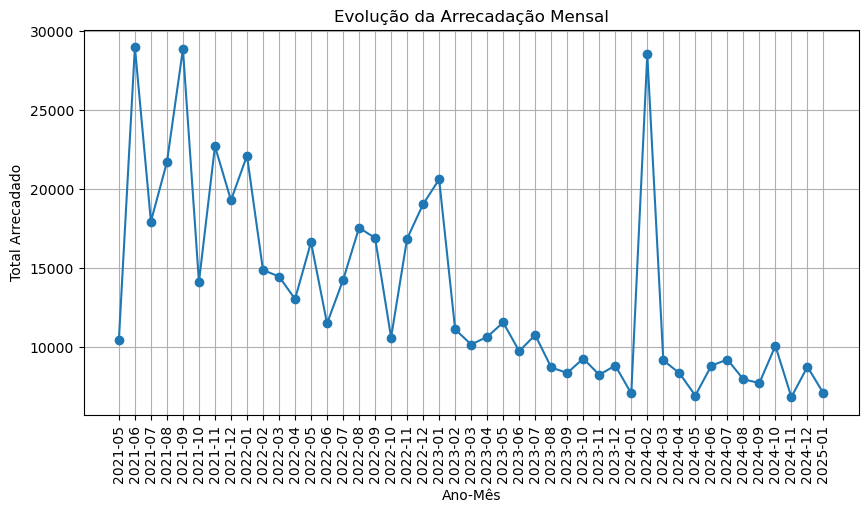

In [16]:
#10. Como está a soma de arrecadações por mês? (gráfico de linhas)
consolidado_arrecadado_mes_ano
plt.figure(figsize=(10, 5))
plt.plot(consolidado_arrecadado_mes_ano["AnoMes"].astype(str), consolidado_arrecadado_mes_ano["Valor"], marker='o', linestyle='-')
plt.xticks(rotation=90)
plt.xlabel("Ano-Mês")
plt.ylabel("Total Arrecadado")
plt.title("Evolução da Arrecadação Mensal")
plt.grid(True)
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


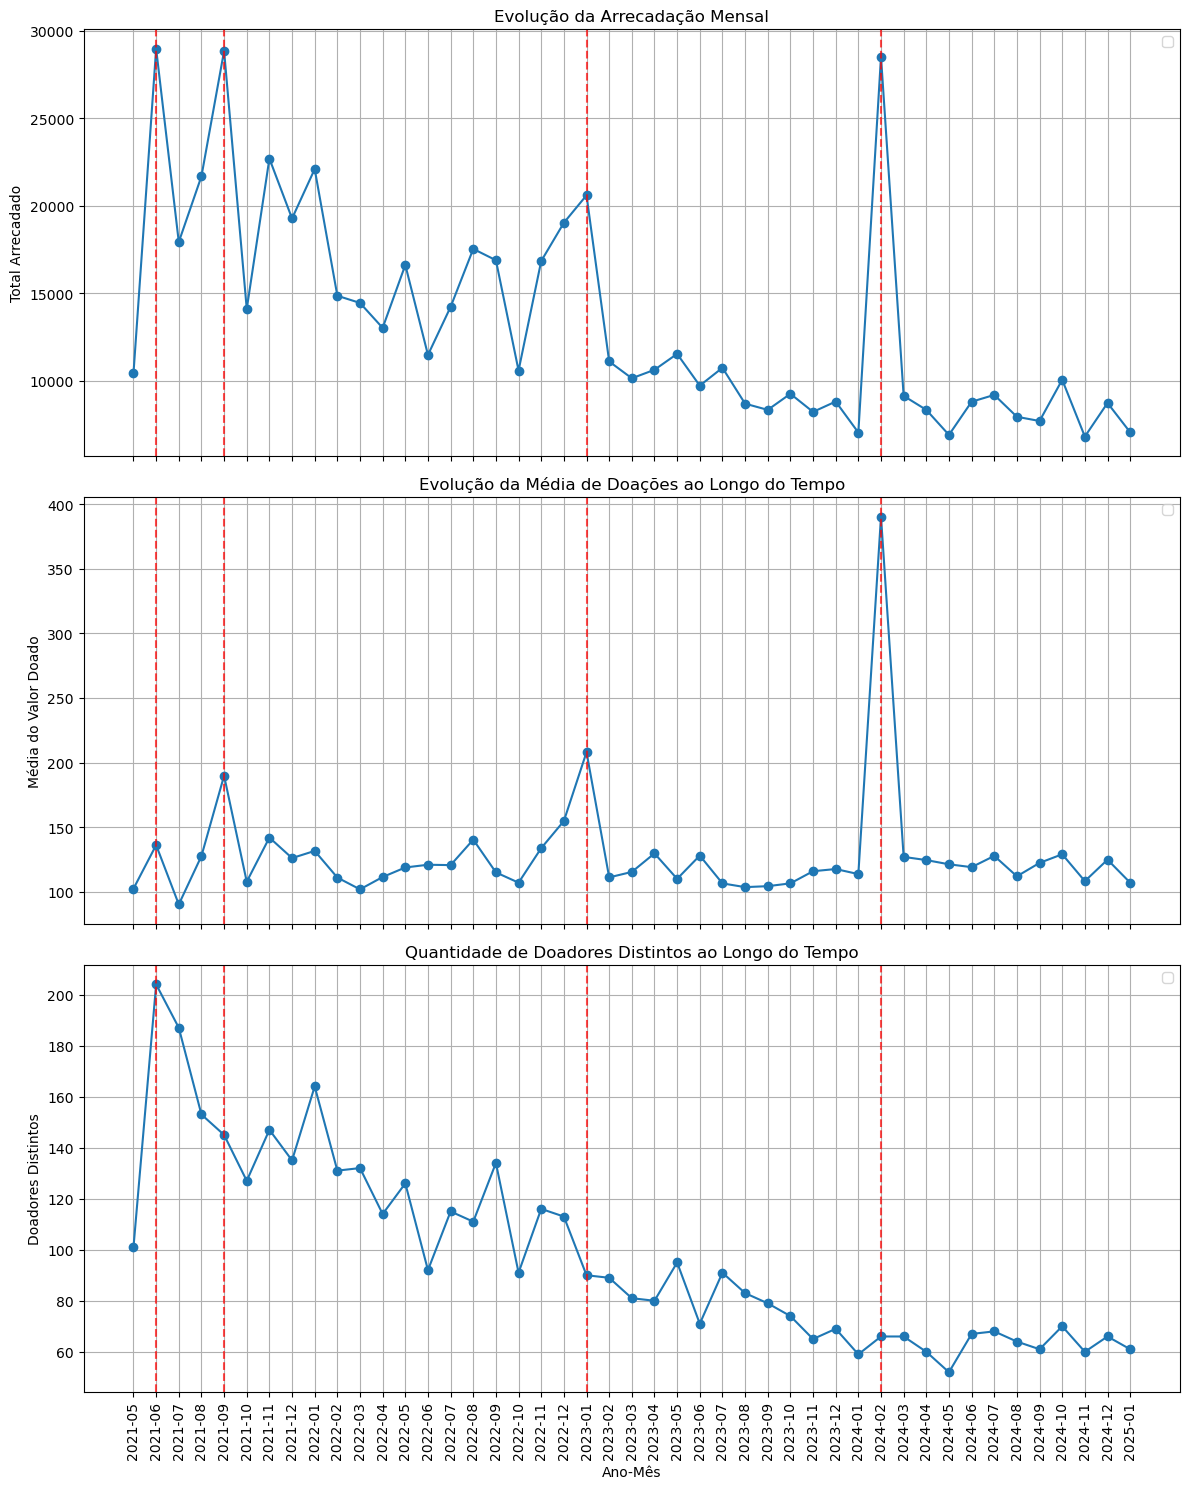

In [17]:
#para observar melhor, colocando os 3 gráficos juntos

# Definindo as datas onde queremos as linhas verticais
linhas_verticais = ["2021-06", "2021-09", "2023-01", "2024-02"]

fig, axes = plt.subplots(3, 1, figsize=(12, 15), sharex=True)

# 1. Evolução da Arrecadação Mensal
axes[0].plot(consolidado_arrecadado_mes_ano["AnoMes"].astype(str), 
             consolidado_arrecadado_mes_ano["Valor"], 
             marker='o', linestyle='-')
axes[0].set_ylabel("Total Arrecadado")
axes[0].set_title("Evolução da Arrecadação Mensal")
axes[0].grid(True)

# 2. Evolução da Média de Doações ao Longo do Tempo
axes[1].plot(media_valor_mes["AnoMes"].astype(str), 
             media_valor_mes["Valor"], 
             marker='o', linestyle='-')
axes[1].set_ylabel("Média do Valor Doado")
axes[1].set_title("Evolução da Média de Doações ao Longo do Tempo")  # CORRIGIDO
axes[1].grid(True)

# 3. Quantidade de Doadores Distintos ao Longo do Tempo
axes[2].plot(doadores_por_mes["AnoMes"].astype(str), 
             doadores_por_mes["ID"], 
             marker='o', linestyle='-')
axes[2].set_ylabel("Doadores Distintos")
axes[2].set_title("Quantidade de Doadores Distintos ao Longo do Tempo")
axes[2].set_xlabel("Ano-Mês")
axes[2].grid(True)

# Adicionando linhas verticais nos três gráficos
for ax in axes:
    for linha in linhas_verticais:
        ax.axvline(x=linha, color='r', linestyle='--', alpha=0.7)
    ax.legend()

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [18]:
#qual o valor arrecadado no total?
total_arrecadado = consolidado_arrecadado["Valor"].sum()
print(f"Total arrecadado: {total_arrecadado}")

Total arrecadado: 605473.5700000001


Os 20% principais doadores contribuíram com 80.87% do total arrecadado.


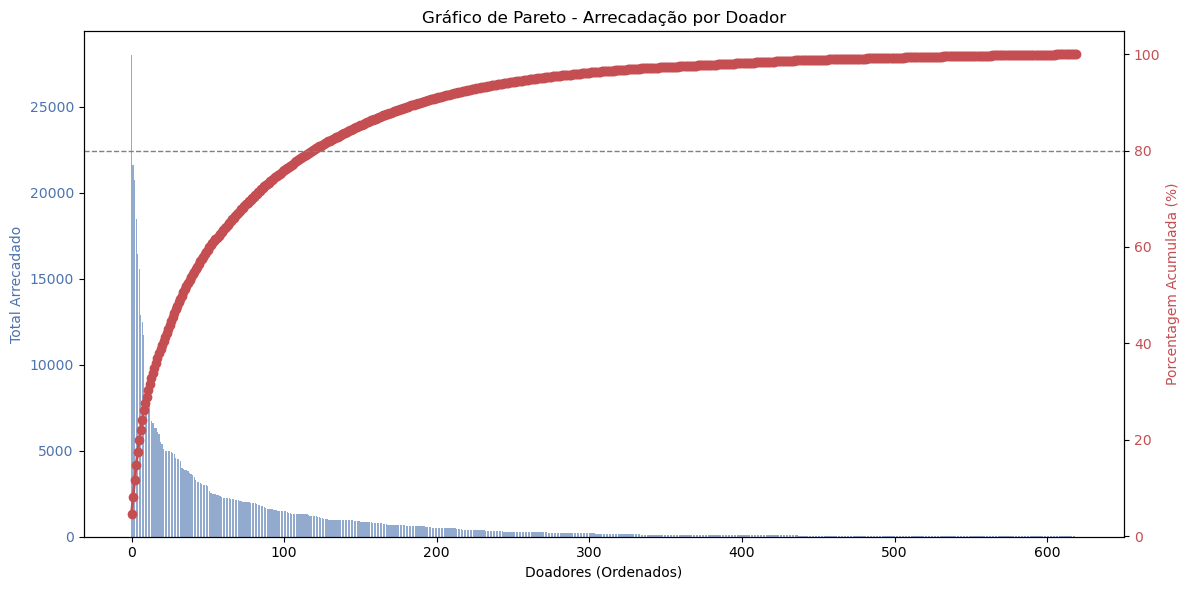

In [19]:
# Agrupar por doador e somar as doações
doacoes_por_doador = consolidado_arrecadado.groupby("ID")["Valor"].sum().sort_values(ascending=False)

# Transformar em DataFrame com coluna nomeada
doacoes_por_doador = doacoes_por_doador.reset_index()
doacoes_por_doador.columns = ["ID", "Valor"]

# Total arrecadado
total_doado = doacoes_por_doador["Valor"].sum()

# Calcular porcentagem acumulada
doacoes_por_doador["% Acumulado"] = doacoes_por_doador["Valor"].cumsum() / total_doado * 100

# Calcular o ponto de 20% dos doadores
quantidade_doadores = len(doacoes_por_doador)
limite_20_porcento = int(quantidade_doadores * 0.2)

# Verificar a arrecadação acumulada dos 20% principais
arrecadacao_20_porcento = doacoes_por_doador["% Acumulado"].iloc[limite_20_porcento - 1]

print(f"Os 20% principais doadores contribuíram com {arrecadacao_20_porcento:.2f}% do total arrecadado.")

# Gráfico de Pareto
fig, ax1 = plt.subplots(figsize=(12, 6))

# Barras: valor arrecadado por doador
ax1.bar(range(quantidade_doadores), doacoes_por_doador["Valor"], 
        color="#4C72B0", alpha=0.6, label="Total Arrecadado por Doador")
ax1.set_ylabel("Total Arrecadado", color="#4C72B0")
ax1.set_xlabel("Doadores (Ordenados)")
ax1.tick_params(axis="y", labelcolor="#4C72B0")

# Linha: porcentagem acumulada
ax2 = ax1.twinx()
ax2.plot(range(quantidade_doadores), doacoes_por_doador["% Acumulado"], 
         color="#C44E52", marker="o", linestyle="-", linewidth=2, label="Porcentagem Acumulada")
ax2.axhline(80, color="gray", linestyle="--", linewidth=1)
ax2.set_ylabel("Porcentagem Acumulada (%)", color="#C44E52")
ax2.tick_params(axis="y", labelcolor="#C44E52")

# Título e layout
plt.title("Gráfico de Pareto - Arrecadação por Doador")
fig.tight_layout()
plt.show()


Para alcançar 80% do total arrecadado, são necessários aproximadamente 119 doadores, o que representa 19.19% do total de doadores.


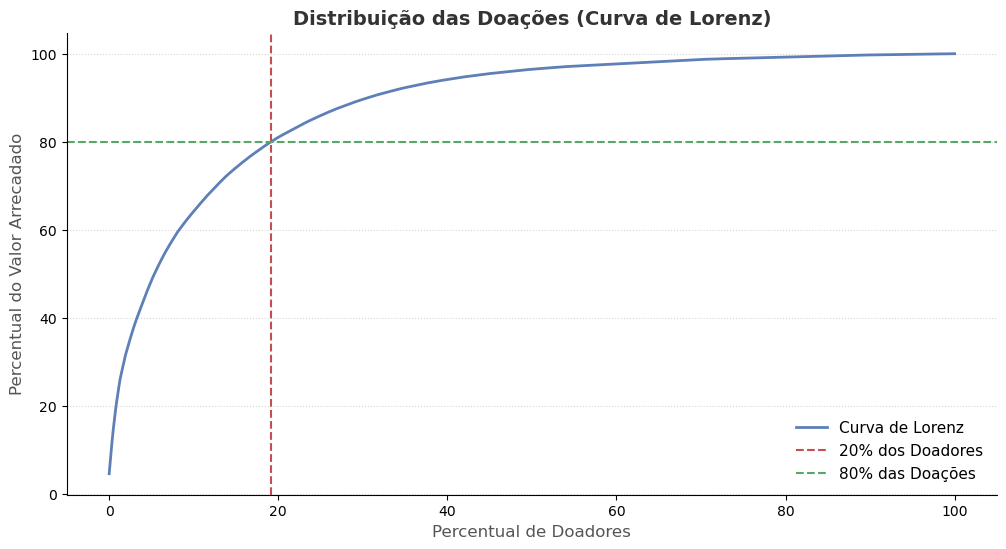

In [20]:
# Já foi feito no código anterior:
# - Agrupar por doador e somar valores
# - Transformar em DataFrame
# - Calcular total_doado
# - Calcular % Acumulado

# Passo 4: Determinar quantos doadores representam 80% do valor arrecadado
# (reaproveitando doacoes_por_doador, total_doado e % Acumulado)
doadores_80 = doacoes_por_doador[doacoes_por_doador["% Acumulado"] <= 80].shape[0]
percentual_doadores = (doadores_80 / quantidade_doadores) * 100

# Exibir resultado
print(f"Para alcançar 80% do total arrecadado, são necessários aproximadamente {doadores_80} doadores, "
      f"o que representa {percentual_doadores:.2f}% do total de doadores.")

# Passo 5: Gráfico da Curva de Lorenz
fig, ax = plt.subplots(figsize=(12, 6))

# Linha da curva de Lorenz
ax.plot(np.linspace(0, 100, quantidade_doadores), doacoes_por_doador["% Acumulado"], 
        color="#4C72B0", linewidth=2, alpha=0.9, label="Curva de Lorenz")

# Linhas de referência 80/20
ax.axvline(x=percentual_doadores, color="#C44E52", linestyle="--", linewidth=1.5, label="20% dos Doadores")
ax.axhline(y=80, color="#55A868", linestyle="--", linewidth=1.5, label="80% das Doações")

# Estilo clean
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.grid(axis="y", linestyle="dotted", alpha=0.5)

# Rótulos e título
ax.set_xlabel("Percentual de Doadores", fontsize=12, color="#555555")
ax.set_ylabel("Percentual do Valor Arrecadado", fontsize=12, color="#555555")
ax.set_title("Distribuição das Doações (Curva de Lorenz)", fontsize=14, color="#333333", weight='bold')

# Legenda
ax.legend(frameon=False, fontsize=11, loc="lower right")

# Fundo limpo
fig.patch.set_facecolor("white")

# Mostrar
plt.show()


## Explorar base  consolidado_gastos

Validando os dados
1. Os gastos batem, mensalmente (isso quer dizer que tem que somar por mês) com o relatório disponível? 

Explorando um pouco
1. Qual a menor e maior data?
2. Quantos tipos de gastos distintos existem e suas qtdes e soma de valores?
3. Quantos locais de gastos distintos existem e suas qtdes e soma de valores?
4. Qual a distribuição do valores doados de uma forma geral? (descritiva, histograma e boxplot)
5. Como é a soma de valor gasto por mês?  Existe algum comportamento ao longo do tempo? (gráfico de linha)

In [21]:
consolidado_custos

,Num_Nota,Data,Descrição,Local,Valor,Fonte,AnoMes,Ano
0,1,2025-01-05,Salário Cleverton (motorista),NaN,3250.00,gastos_janeiro_2025,2025-01,2025
1,2,2025-01-05,Salário Thiago (cozinheiro),NaN,3250.00,gastos_janeiro_2025,2025-01,2025
2,3,2025-01-05,Aluguel da cozinha casa Thiago,NaN,1200.00,gastos_janeiro_2025,2025-01,2025
3,4,2025-01-21,Gasolina,GS Posto de Combustivel Ltda,60.00,gastos_janeiro_2025,2025-01,2025
4,5,2025-01-22,Atacadao,Brasileiro Atacado SA,435.25,gastos_janeiro_2025,2025-01,2025
...,...,...,...,...,...,...,...,...
778,18,2021-05-26,2 kits de Colheres - 500 unidades,"(a nota ainda nao foi emitida, solicitando no ...",307.96,gastos_maio_21,2021-05,2021
779,19,2021-05-26,Emabalagens de Marmitas - 1500 unidades,"(a nota ainda nao foi emitida, solicitando no ...",669.95,gastos_maio_21,2021-05,2021
780,20,2021-05-26,Emabalagem de marmitsa - 300 unidades,Norpak comercio de embalagem,225.00,gastos_maio_21,2021-05,2021
781,21,2021-05-31,Salário Thiago (cozinheiro),NaN,3000.00,gastos_maio_21,2021-05,2021


In [22]:
#Validando os dados
#Os gastos batem, mensalmente (isso quer dizer que tem que somar por mês) com o relatório disponível?
consolidado_custos_mes_ano = consolidado_custos.groupby("AnoMes")["Valor"].sum().reset_index()
consolidado_custos_mes_ano

,AnoMes,Valor
0,2021-05,12884.54
1,2021-06,13132.50
2,2021-07,15978.05
3,2021-08,24248.93
4,2021-09,19951.01
5,2021-10,23691.14
6,2021-11,14047.73
7,2021-12,27680.62
8,2022-01,17053.57
9,2022-02,9018.28


In [23]:
#vamos verificar se existem bases com mais de 1 mês na data?
quantidade_linhas = consolidado_custos.groupby(["Fonte", "AnoMes"]).size().reset_index(name="Quantidade")
print(quantidade_linhas)

contagem_fonte = quantidade_linhas["Fonte"].value_counts().reset_index()
contagem_fonte.columns = ["Fonte", "Frequência"]
contagem_fonte = contagem_fonte.sort_values(by="Frequência", ascending=False)

print(contagem_fonte)

                   Fonte   AnoMes  Quantidade
0        gastos_abril_22  2022-04          12
1        gastos_abril_22  2022-05           2
2        gastos_abril_23  2023-03           3
3        gastos_abril_23  2023-04          21
4        gastos_abril_24  2024-04          16
5     gastos_agosto_2024  2024-08          12
6       gastos_agosto_21  2021-08          33
7       gastos_agosto_22  2022-08          29
8       gastos_agosto_23  2023-08          13
9   gastos_dezembro_2024  2024-12           8
10    gastos_dezembro_21  2021-12          16
11    gastos_dezembro_22  2022-12          16
12    gastos_dezembro_23  2023-12          15
13   gastos_fevereiro_22  2022-02          10
14   gastos_fevereiro_22  2022-03           5
15   gastos_fevereiro_23  2023-02          10
16   gastos_fevereiro_24  2024-02           8
17   gastos_janeiro_2025  2025-01          10
18     gastos_janeiro_22  2022-01          12
19     gastos_janeiro_23  2023-01          12
20     gastos_janeiro_24  2024-01 

In [24]:
#1. Qual a menor e maior data?
menor_data = consolidado_custos["Data"].min()
maior_data = consolidado_custos["Data"].max()

print(f"Menor data: {menor_data}, Maior data: {maior_data}")


Menor data: 2021-05-01 00:00:00, Maior data: 2025-01-29 00:00:00


In [25]:
#2. Quantos tipos de gastos distintos existem e suas qtdes e soma de valores?
tipos_gastos = consolidado_custos.groupby("Descrição").agg(
    Quantidade=("Valor", "count"),
    Soma_Valor=("Valor", "sum")
).reset_index()
pd.set_option("display.max_rows", 70) 
tipos_gastos.head(70)

,Descrição,Quantidade,Soma_Valor
0,1 mil marmitas + fio para casa de um ex morado...,1,835.90
1,100 Embalagem Marmitas,1,65.00
2,100 cobertores para doação,1,1099.00
3,1000 colheres embaladas,1,307.96
4,2 Botijões de gás,1,189.60
5,2 Botijões pro fogão novo,1,739.80
6,2 barracas de 2 lugares,1,289.80
7,2 barracas de 4 lugares,1,355.76
8,2 kits de Colheres - 500 unidades,1,307.96
9,2 x Kit Colher Refeicao Com Guardanapo Embalad...,5,1589.00


In [26]:
#3. Quantos locais de gastos distintos existem e suas qtdes e soma de valores?
locais_gastos = consolidado_custos.groupby("Local").agg(
    Quantidade=("Valor", "count"),
    Soma_Valor=("Valor", "sum")
).reset_index()
pd.set_option("display.max_rows", 117) 
locais_gastos.head(117)

,Local,Quantidade,Soma_Valor
0,"(a nota ainda nao foi emitida, solicitando no ...",2,977.91
1,24 Subdistrito RCPN,2,346.00
2,99 Taxi,1,27.80
3,ARM DISTRIBUIDORA EMBALAGENS E PRODUTOS EM GER...,1,72.88
4,ARM Distribuidora,1,133.00
5,AZ Shopping,1,289.80
6,Agua espraiada she,1,190.14
7,Aparecida Comercio Varejista,3,470.67
8,Atacadão Ipiranga,1,829.41
9,Atacadão S.A.,108,85277.50


count     783.000000
mean      776.861903
std      1064.379345
min         3.990000
25%        60.000000
50%       256.730000
75%       930.940000
max      3602.850000
Name: Valor, dtype: float64


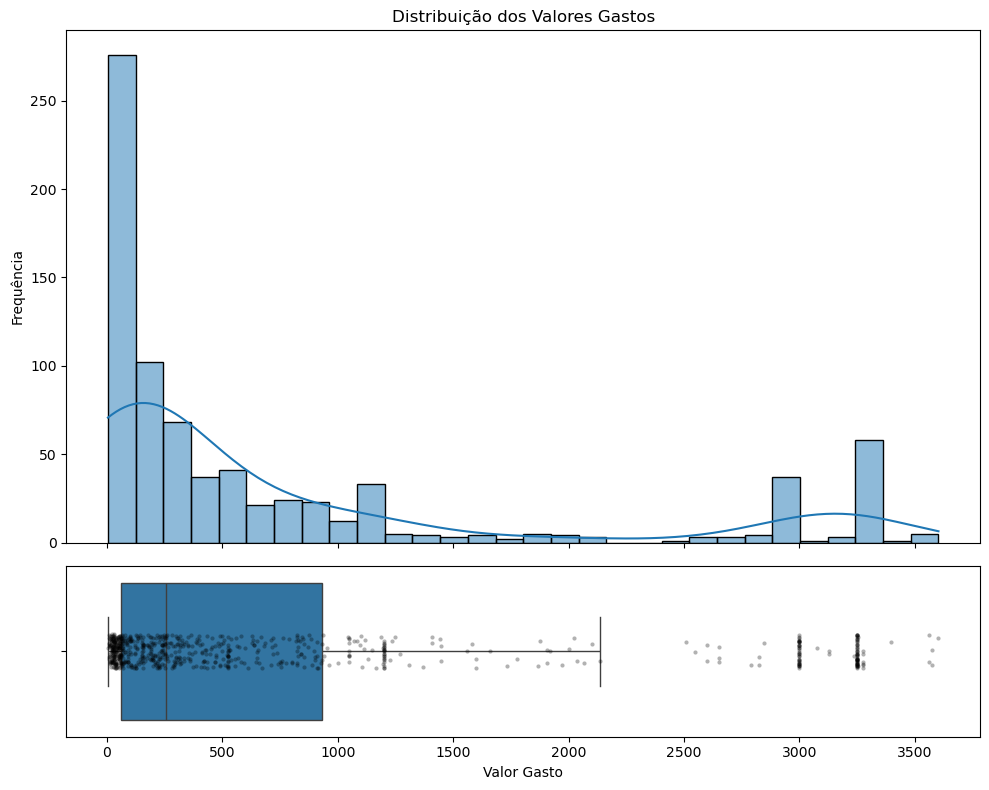

In [27]:
#4. Qual a distribuição do valores doados de uma forma geral? (descritiva, histograma e boxplot)
# Estatísticas descritivas
print(consolidado_custos["Valor"].describe())

# Criando a figura e os eixos compartilhados
fig, ax = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={"height_ratios": [3, 1]}, sharex=True)

# Histograma
sns.histplot(consolidado_custos["Valor"], bins=30, kde=True, ax=ax[0])
ax[0].set_ylabel("Frequência")
ax[0].set_title("Distribuição dos Valores Gastos")

# Boxplot com pontos individuais
sns.boxplot(x=consolidado_custos["Valor"], ax=ax[1], showfliers=False)
sns.stripplot(x=consolidado_custos["Valor"], ax=ax[1], color="black", alpha=0.3, jitter=True, size=3)
ax[1].set_xlabel("Valor Gasto")
ax[1].set_ylabel("")

# Ajuste de layout
plt.tight_layout()
plt.show()

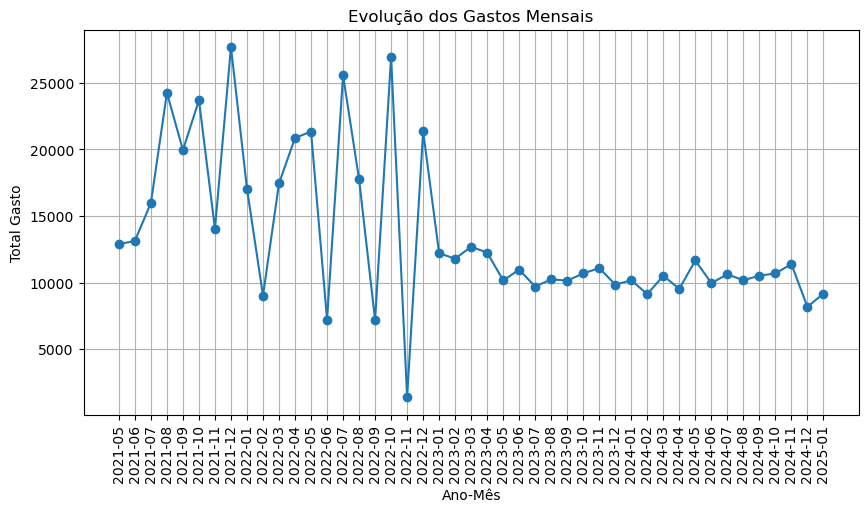

In [28]:
#5. Como é a soma de valor gasto por mês?  Existe algum comportamento ao longo do tempo? (gráfico de linha)

consolidado_custos_mes_ano

plt.figure(figsize=(10, 5))
plt.plot(consolidado_custos_mes_ano["AnoMes"].astype(str), consolidado_custos_mes_ano["Valor"], marker='o', linestyle='-')
plt.xticks(rotation=90)
plt.xlabel("Ano-Mês")
plt.ylabel("Total Gasto")
plt.title("Evolução dos Gastos Mensais")
plt.grid(True)
plt.show()


In [29]:
#qual o valor gasto no total?
total_gasto = consolidado_custos["Valor"].sum()
print(f"Total gasto: {total_gasto}")

Total gasto: 608282.8700000001


## Explorar base descricao_marmitas

Validando os dados
1. As quantidades batem, mensalmente (isso quer dizer que tem que somar por mês) com o relatório disponível? 

Explorando um pouco
1. Qual a menor e maior data?
2. Qual a distribuição de quantidade de marmita doadas de uma forma geral? (descritiva, histograma e boxplot)
3. Como é a soma de quantidade de marmita doadas por mês?  Existe algum comportamento ao longo do tempo? (gráfico de linha)

In [30]:
descricao_marmitas

,Carimbo de data/hora,Data,Quantidade,Cardápio,frango,carne,calabresa,linguiça,arroz,feijao,macarrao,AnoMes,Ano
0,NaT,2021-05-01,47.0,"arroz, feijao, farofa e carne com batata",0.0,5.0,0.0,0.0,2.5,2.0,0,2021-05,2021
1,NaT,2021-05-02,45.0,"Arroz, Strogonoff de frango e batata palha.",5.0,0.0,0.0,0.0,2.5,0.0,0,2021-05,2021
2,NaT,2021-05-03,46.0,"Arroz, feijao, farofa e carne com batata",0.0,5.0,0.0,0.0,2.5,2.0,0,2021-05,2021
3,NaT,2021-05-04,44.0,"Arroz, feijao, farofa e carne de porco",0.0,5.0,0.0,0.0,2.5,2.0,0,2021-05,2021
4,2021-05-05 13:33:27.124,2021-05-05,47.0,Macarrão com molho de linguiça.,0.0,0.0,0.0,5.0,0.0,0.0,2,2021-05,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,2025-02-04 17:27:29.566,2025-01-24,47.0,"Arroz, feijão preto, carne moida com acelga e ...",0.0,2.0,0.0,0.0,1.5,1.5,0,2025-01,2025
936,2025-02-04 17:28:05.468,2025-01-28,57.0,Macarrão com molho de linguiça.,0.0,0.0,0.0,2.5,0.0,0.0,3,2025-01,2025
937,2025-02-04 17:28:34.479,2025-01-29,53.0,"Arroz, feijão, moela com legumes e purê de bat...",0.0,2.0,0.0,0.0,1.5,1.5,0,2025-01,2025
938,2025-02-04 17:29:09.471,2025-01-30,61.0,"Arroz, feijão, carne moída com batata e salada...",0.0,2.0,0.0,0.0,1.5,1.5,0,2025-01,2025


In [34]:
#Validando os dados
#1. As quantidades batem, mensalmente (isso quer dizer que tem que somar por mês) com o relatório disponível? 
descricao_marmitas_mes_ano = descricao_marmitas.groupby("AnoMes")["Quantidade"].sum().reset_index()
descricao_marmitas_mes_ano

,AnoMes,Quantidade
0,2021-05,1485.0
1,2021-06,1584.0
2,2021-07,1665.0
3,2021-08,1558.0
4,2021-09,2645.0
5,2021-10,2579.0
6,2021-11,2868.0
7,2021-12,2292.0
8,2022-01,1906.0
9,2022-02,1924.0


In [35]:
#1. Qual a menor e maior data?
menor_data = descricao_marmitas["Data"].min()
maior_data = descricao_marmitas["Data"].max()

print(f"Menor data: {menor_data}, Maior data: {maior_data}")


Menor data: 2021-05-01 00:00:00, Maior data: 2025-01-31 00:00:00


count    854.000000
mean      66.536300
std       22.586823
min       27.000000
25%       50.000000
50%       58.500000
75%       78.000000
max      156.000000
Name: Quantidade, dtype: float64


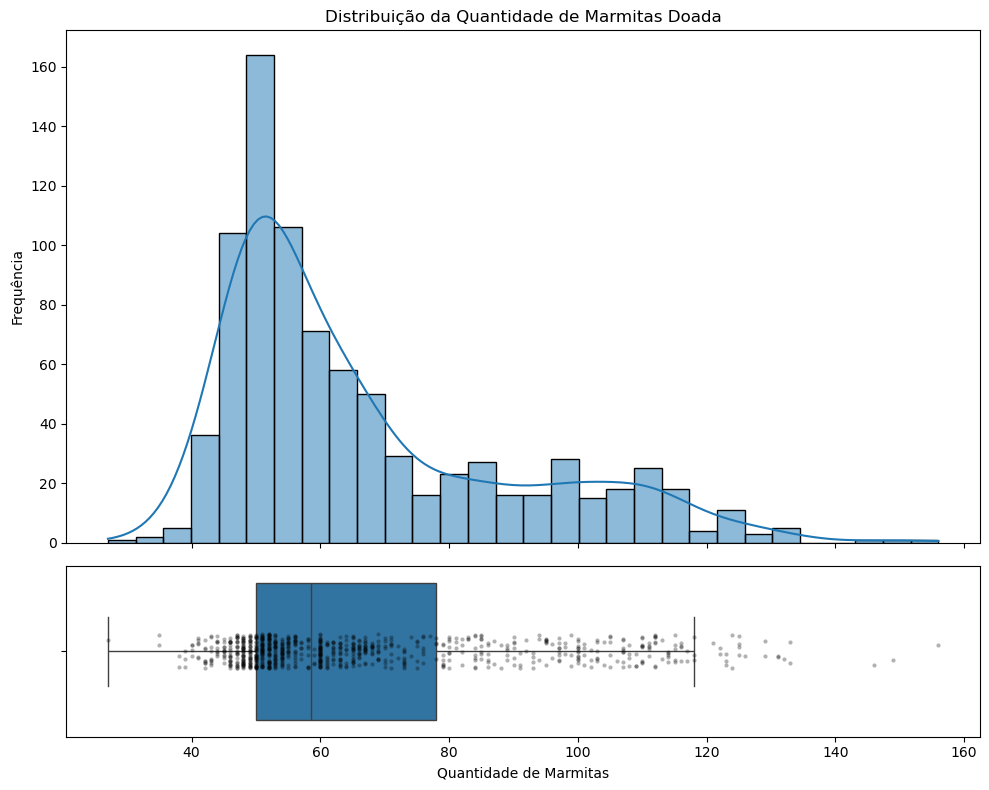

In [36]:
#2. Qual a distribuição de quantidade de marmita doadas de uma forma geral? (descritiva, histograma e boxplot)
# Estatísticas descritivas
print(descricao_marmitas["Quantidade"].describe())

# Criando a figura e os eixos compartilhados
fig, ax = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={"height_ratios": [3, 1]}, sharex=True)

# Histograma
sns.histplot(descricao_marmitas["Quantidade"], bins=30, kde=True, ax=ax[0])
ax[0].set_ylabel("Frequência")
ax[0].set_title("Distribuição da Quantidade de Marmitas Doada")

# Boxplot com pontos individuais
sns.boxplot(x=descricao_marmitas["Quantidade"], ax=ax[1], showfliers=False)
sns.stripplot(x=descricao_marmitas["Quantidade"], ax=ax[1], color="black", alpha=0.3, jitter=True, size=3)
ax[1].set_xlabel("Quantidade de Marmitas")
ax[1].set_ylabel("")

# Ajuste de layout
plt.tight_layout()
plt.show()


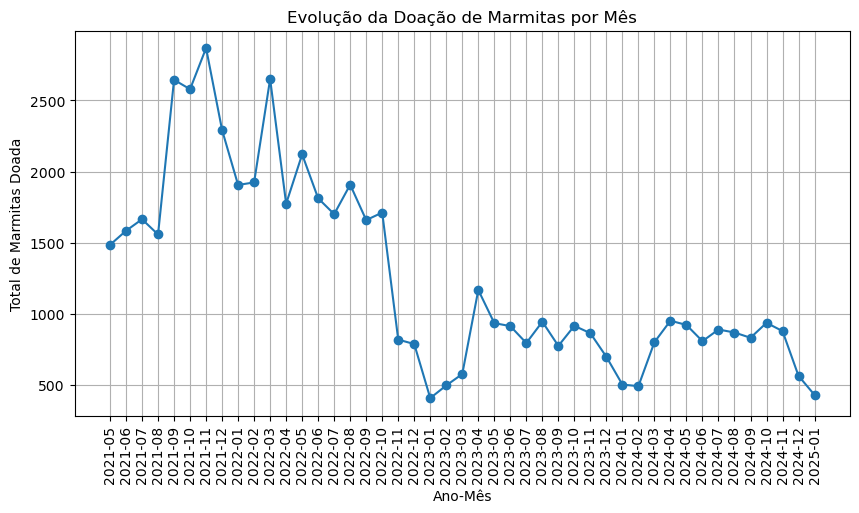

In [37]:
#3. Como é a soma de quantidade de marmita doadas por mês?  Existe algum comportamento ao longo do tempo? (gráfico de linha)
descricao_marmitas_mes_ano

plt.figure(figsize=(10, 5))
plt.plot(descricao_marmitas_mes_ano["AnoMes"].astype(str), descricao_marmitas_mes_ano["Quantidade"], marker='o', linestyle='-')
plt.xticks(rotation=90)
plt.xlabel("Ano-Mês")
plt.ylabel("Total de Marmitas Doada")
plt.title("Evolução da Doação de Marmitas por Mês")
plt.grid(True)
plt.show()


In [38]:
#qual a quantidade de marmitas produzidas no total?
# Somar a quantidade total de marmitas produzidas
total_marmitas = descricao_marmitas["Quantidade"].sum()
print(f"Total de marmitas produzidas: {total_marmitas}")

Total de marmitas produzidas: 56822.0


## Juntando as 3 bases

Join das 3 bases, na visão mês/ano. 
Com isso, vamos ter arrecadado, gasto e qtd produzida, o que nos permite:

1. Como está o arrecadado e gasto por mês? (gráfico de linhas)
2. Tem sobra por mês?
3. Criar racional da sobra acumulada.
4. Qual custo de cada marmita por mês? (criar a variável custo_marmita)
5. Como é o comportamento custo_marmita ao logo dos meses?

In [39]:
# Fazendo o merge das tabelas pela coluna "AnoMes"
consolidado_ano_mes = consolidado_arrecadado_mes_ano \
    .merge(consolidado_custos_mes_ano, on="AnoMes", how="outer", suffixes=("_arrecadado", "_gasto")) \
    .merge(descricao_marmitas_mes_ano, on="AnoMes", how="outer")
consolidado_ano_mes

,AnoMes,Valor_arrecadado,Valor_gasto,Quantidade
0,2021-05,10430.00,12884.54,1485.0
1,2021-06,28970.00,13132.50,1584.0
2,2021-07,17926.00,15978.05,1665.0
3,2021-08,21681.00,24248.93,1558.0
4,2021-09,28844.60,19951.01,2645.0
5,2021-10,14100.00,23691.14,2579.0
6,2021-11,22694.63,14047.73,2868.0
7,2021-12,19270.25,27680.62,2292.0
8,2022-01,22093.33,17053.57,1906.0
9,2022-02,14855.00,9018.28,1924.0


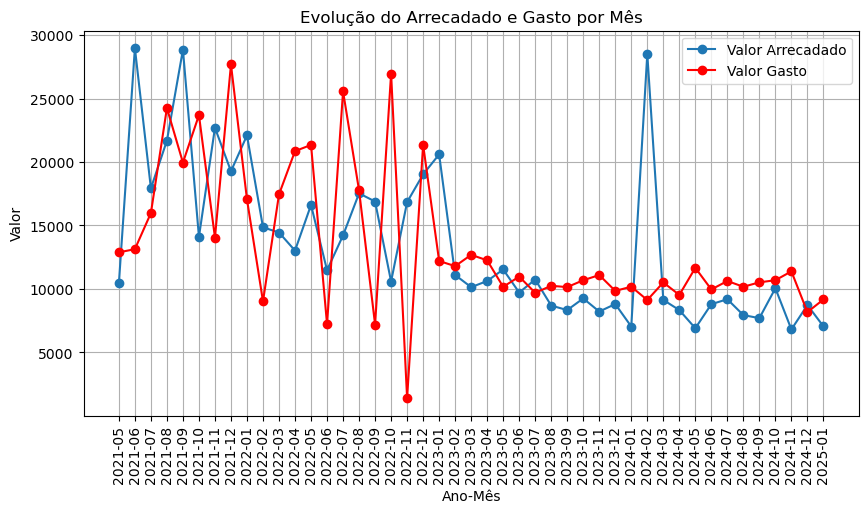

In [40]:
#1. Como está o arrecadado e gasto por mês? (gráfico de linhas)

plt.figure(figsize=(10, 5))
plt.plot(consolidado_ano_mes["AnoMes"].astype(str), consolidado_ano_mes["Valor_arrecadado"], marker='o', linestyle='-', label="Valor Arrecadado")
plt.plot(consolidado_ano_mes["AnoMes"].astype(str), consolidado_ano_mes["Valor_gasto"], marker='o', linestyle='-', label="Valor Gasto", color='red')
plt.xticks(rotation=90)
plt.xlabel("Ano-Mês")
plt.ylabel("Valor")
plt.title("Evolução do Arrecadado e Gasto por Mês")
plt.legend()
plt.grid(True)
plt.show()


In [41]:
#2. Tem sobra por mês?
consolidado_ano_mes["Sobra_Mensal"] = consolidado_ano_mes["Valor_arrecadado"] - consolidado_ano_mes["Valor_gasto"]

consolidado_ano_mes

,AnoMes,Valor_arrecadado,Valor_gasto,Quantidade,Sobra_Mensal
0,2021-05,10430.00,12884.54,1485.0,-2454.54
1,2021-06,28970.00,13132.50,1584.0,15837.50
2,2021-07,17926.00,15978.05,1665.0,1947.95
3,2021-08,21681.00,24248.93,1558.0,-2567.93
4,2021-09,28844.60,19951.01,2645.0,8893.59
5,2021-10,14100.00,23691.14,2579.0,-9591.14
6,2021-11,22694.63,14047.73,2868.0,8646.90
7,2021-12,19270.25,27680.62,2292.0,-8410.37
8,2022-01,22093.33,17053.57,1906.0,5039.76
9,2022-02,14855.00,9018.28,1924.0,5836.72


In [42]:
#3. Criar racional da sobra acumulada.
# Criar uma cópia para garantir que os cálculos sejam feitos corretamente
consolidado_ano_mes = consolidado_ano_mes.sort_values("AnoMes").copy()

# Criar uma nova coluna para armazenar a sobra acumulada corretamente
consolidado_ano_mes["Sobra_Ajustada"] = 0.0  

# Inicializar a primeira sobra
sobra_acumulada = 0  

# Loop para calcular a sobra mês a mês de forma encadeada
for i in range(len(consolidado_ano_mes)):
    # Pega os valores do mês atual
    arrecadado = consolidado_ano_mes.loc[i, "Valor_arrecadado"]
    gasto = consolidado_ano_mes.loc[i, "Valor_gasto"]
    
    # Ajusta o valor arrecadado considerando a sobra acumulada anterior
    arrecadado_ajustado = arrecadado + sobra_acumulada
    
    # Calcula a sobra do mês
    sobra = arrecadado_ajustado - gasto
    
    # Salva a sobra no DataFrame
    consolidado_ano_mes.loc[i, "Sobra_Ajustada"] = sobra
    
    # Atualiza a sobra acumulada para o próximo mês
    sobra_acumulada = sobra  # Carrega para o próximo mês

consolidado_ano_mes

,AnoMes,Valor_arrecadado,Valor_gasto,Quantidade,Sobra_Mensal,Sobra_Ajustada
0,2021-05,10430.00,12884.54,1485.0,-2454.54,-2454.54
1,2021-06,28970.00,13132.50,1584.0,15837.50,13382.96
2,2021-07,17926.00,15978.05,1665.0,1947.95,15330.91
3,2021-08,21681.00,24248.93,1558.0,-2567.93,12762.98
4,2021-09,28844.60,19951.01,2645.0,8893.59,21656.57
5,2021-10,14100.00,23691.14,2579.0,-9591.14,12065.43
6,2021-11,22694.63,14047.73,2868.0,8646.90,20712.33
7,2021-12,19270.25,27680.62,2292.0,-8410.37,12301.96
8,2022-01,22093.33,17053.57,1906.0,5039.76,17341.72
9,2022-02,14855.00,9018.28,1924.0,5836.72,23178.44


In [43]:
# Definir o mês onde a sobra foi coberta manualmente
mes_zerado = "2022-10"

# Criar uma cópia da tabela ordenada
consolidado_ano_mes = consolidado_ano_mes.sort_values("AnoMes").copy()

# Criar uma nova coluna para armazenar a sobra ajustada corretamente
consolidado_ano_mes["Sobra_Ajustada"] = 0.0  

# Inicializar a primeira sobra
sobra_acumulada = 0  

# Loop para calcular a sobra mês a mês de forma encadeada
for i in range(len(consolidado_ano_mes)):
    # Pega os valores do mês atual
    arrecadado = consolidado_ano_mes.loc[i, "Valor_arrecadado"]
    gasto = consolidado_ano_mes.loc[i, "Valor_gasto"]
    
    # Se for o mês zerado, redefinir a sobra acumulada
    if str(consolidado_ano_mes.loc[i, "AnoMes"]) == mes_zerado:
        sobra_acumulada = 0  # Zera o impacto da sobra acumulada
        
        # Ajustar o valor arrecadado para refletir que o prejuízo foi coberto
        consolidado_ano_mes.loc[i, "Valor_arrecadado"] = gasto  # Cobrir o valor do gasto

    # Ajusta o valor arrecadado considerando a sobra acumulada anterior
    arrecadado_ajustado = consolidado_ano_mes.loc[i, "Valor_arrecadado"] + sobra_acumulada
    
    # Calcula a sobra do mês
    sobra = arrecadado_ajustado - gasto
    
    # Salva a sobra ajustada no DataFrame
    consolidado_ano_mes.loc[i, "Sobra_Ajustada"] = sobra
    
    # Atualiza a sobra acumulada para o próximo mês
    sobra_acumulada = sobra  # Carrega para o próximo mês

consolidado_ano_mes

,AnoMes,Valor_arrecadado,Valor_gasto,Quantidade,Sobra_Mensal,Sobra_Ajustada
0,2021-05,10430.00,12884.54,1485.0,-2454.54,-2454.54
1,2021-06,28970.00,13132.50,1584.0,15837.50,13382.96
2,2021-07,17926.00,15978.05,1665.0,1947.95,15330.91
3,2021-08,21681.00,24248.93,1558.0,-2567.93,12762.98
4,2021-09,28844.60,19951.01,2645.0,8893.59,21656.57
5,2021-10,14100.00,23691.14,2579.0,-9591.14,12065.43
6,2021-11,22694.63,14047.73,2868.0,8646.90,20712.33
7,2021-12,19270.25,27680.62,2292.0,-8410.37,12301.96
8,2022-01,22093.33,17053.57,1906.0,5039.76,17341.72
9,2022-02,14855.00,9018.28,1924.0,5836.72,23178.44


In [44]:
#4. Qual custo de cada marmita por mês? (criar a variável custo_marmita)
consolidado_ano_mes["Custo_Marmita"] = consolidado_ano_mes["Valor_gasto"] / consolidado_ano_mes["Quantidade"]
consolidado_ano_mes

,AnoMes,Valor_arrecadado,Valor_gasto,Quantidade,Sobra_Mensal,Sobra_Ajustada,Custo_Marmita
0,2021-05,10430.00,12884.54,1485.0,-2454.54,-2454.54,8.676458
1,2021-06,28970.00,13132.50,1584.0,15837.50,13382.96,8.290720
2,2021-07,17926.00,15978.05,1665.0,1947.95,15330.91,9.596426
3,2021-08,21681.00,24248.93,1558.0,-2567.93,12762.98,15.564140
4,2021-09,28844.60,19951.01,2645.0,8893.59,21656.57,7.542915
5,2021-10,14100.00,23691.14,2579.0,-9591.14,12065.43,9.186173
6,2021-11,22694.63,14047.73,2868.0,8646.90,20712.33,4.898093
7,2021-12,19270.25,27680.62,2292.0,-8410.37,12301.96,12.077059
8,2022-01,22093.33,17053.57,1906.0,5039.76,17341.72,8.947308
9,2022-02,14855.00,9018.28,1924.0,5836.72,23178.44,4.687256


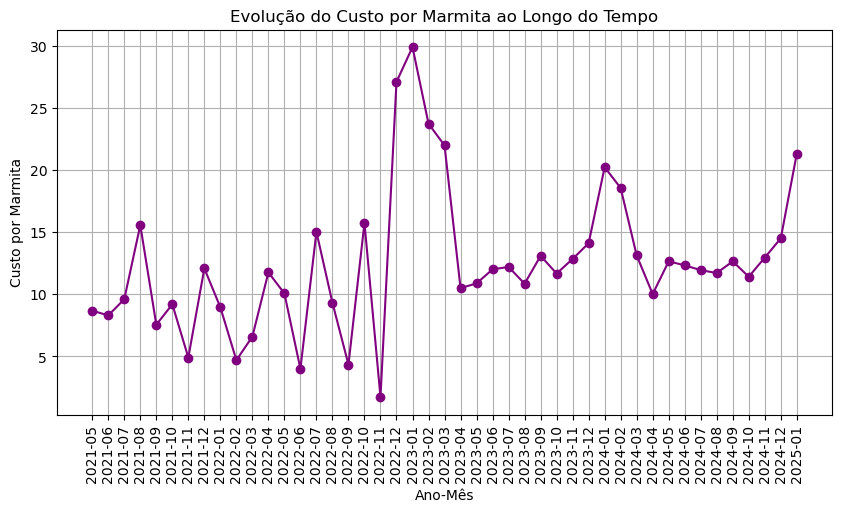

In [45]:
#5. Como é o comportamento custo_marmita ao logo dos meses?
plt.figure(figsize=(10, 5))
plt.plot(consolidado_ano_mes["AnoMes"].astype(str), consolidado_ano_mes["Custo_Marmita"], marker='o', linestyle='-', color='purple')
plt.xticks(rotation=90)
plt.xlabel("Ano-Mês")
plt.ylabel("Custo por Marmita")
plt.title("Evolução do Custo por Marmita ao Longo do Tempo")
plt.grid(True)
plt.show()


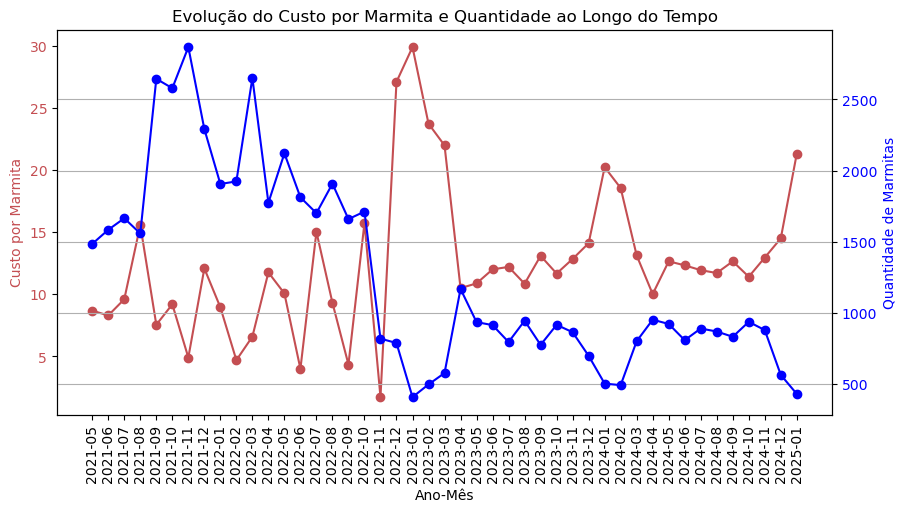

In [46]:
#colocando a produção da marmita no mesmo gráfico - atenção para escalas tão diferentes!
# Criando a figura e o primeiro eixo y
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plotando Custo_Marmita no primeiro eixo y (esquerdo)
ax1.plot(consolidado_ano_mes["AnoMes"].astype(str), consolidado_ano_mes["Custo_Marmita"], 
         marker='o', linestyle='-', color='#C44E52', label="Custo por Marmita")
ax1.set_ylabel("Custo por Marmita", color='#C44E52')
ax1.tick_params(axis='y', labelcolor='#C44E52')

# Criando um segundo eixo y (direito)
ax2 = ax1.twinx()

# Plotando Quantidade no segundo eixo y (direito)
ax2.plot(consolidado_ano_mes["AnoMes"].astype(str), consolidado_ano_mes["Quantidade"], 
         marker='o', linestyle='-', color='blue', label="Quantidade de Marmitas")
ax2.set_ylabel("Quantidade de Marmitas", color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Ajustando rótulos e título
ax1.set_xlabel("Ano-Mês")
ax1.set_xticks(range(len(consolidado_ano_mes["AnoMes"])))  
ax1.set_xticklabels(consolidado_ano_mes["AnoMes"].astype(str), rotation=90)  

plt.title("Evolução do Custo por Marmita e Quantidade ao Longo do Tempo")
plt.grid(True)

# Exibir o gráfico
plt.show()



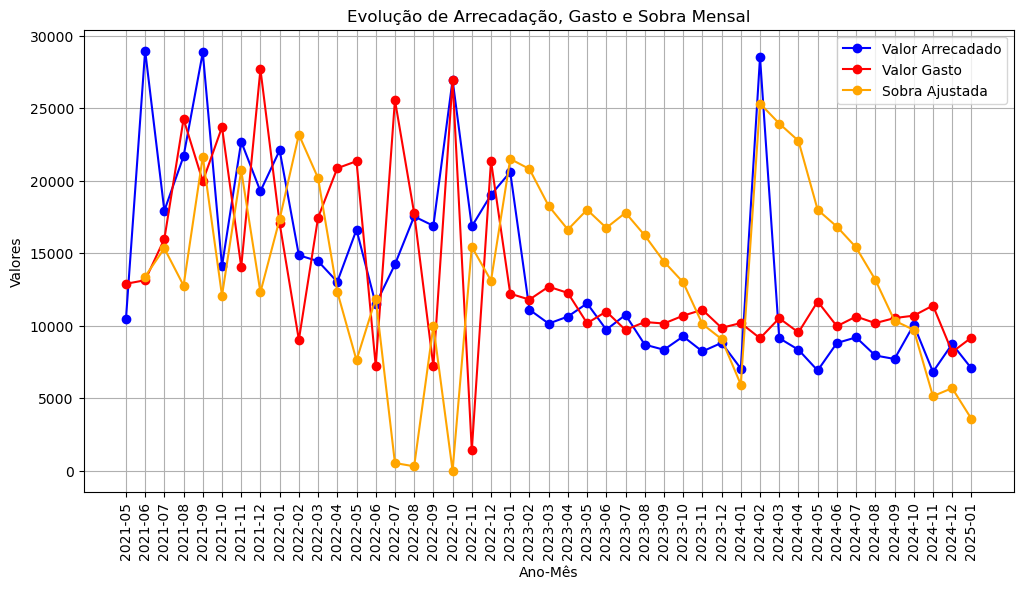

In [47]:
# Criando uma cópia da série para modificar o primeiro valor
sobra_ajustada_corrigida = consolidado_ano_mes["Sobra_Ajustada"].copy()
sobra_ajustada_corrigida.iloc[0] = np.nan  # Removendo o primeiro ponto do gráfico

# Criando o gráfico de linha
plt.figure(figsize=(12, 6))

# Plotando as séries
plt.plot(consolidado_ano_mes["AnoMes"].astype(str), consolidado_ano_mes["Valor_arrecadado"], 
         marker='o', linestyle='-', color='blue', label="Valor Arrecadado")

plt.plot(consolidado_ano_mes["AnoMes"].astype(str), consolidado_ano_mes["Valor_gasto"], 
         marker='o', linestyle='-', color='red', label="Valor Gasto")

plt.plot(consolidado_ano_mes["AnoMes"].astype(str), sobra_ajustada_corrigida, 
         marker='o', linestyle='-', color='orange', label="Sobra Ajustada")

# Ajustando o gráfico
plt.xticks(rotation=90)
plt.xlabel("Ano-Mês")
plt.ylabel("Valores")
plt.title("Evolução de Arrecadação, Gasto e Sobra Mensal")
plt.legend()
plt.grid(True)

# Exibir gráfico
plt.show()
